# Health Insurance Analysis Across America
## PSTAT 134 Final Project


>Authors: Michael Hanson, Maya Samet, Alex Yam

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.plotly as py

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The CDC has been conducting the National Health Interview Survey since 1957 and consists of over-the-phone interviews of willing participants across the country. This interview covers a wide list of questions concerning medical conditions, health insurance, doctor's office visits, physical activity, and health-care use. One of the main functions of the NHIS is to evaluate health programs as well as policies across the country. Along with this, the interview also serves to track health-related behaviors and health care use on a yearly basis. This is the CDC's main way of determining the general health of the nation.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Our goal in this project is to find relations in Health Insurance information and how it pertains to different regions demographics in the US. We want to be able to visualize any variation in the different aspects of health care recipient by comparing these different aspects to the cost of individuals' health insurance plan.

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;The first relation we can test is if there is any relation to the amount of total income a family brings in on an annual basis and the out-of-pocket premium cost of their health care. What we would expect to see is that people with a larger income will tend to pay more than those who have a lower income per year. However, before we can proceed, we have to remove certain outliers that my affect our final result. These particular outliers are included in every category of income per year and they consist of some premium cost numbers around $100,000, which our data set explains should be counted as NaN. After these observations are removed, we specify that we are only looking at the five specific income brackets and not the two other, more general brackets that are include in the data. Using a box plot to visualize, we get:

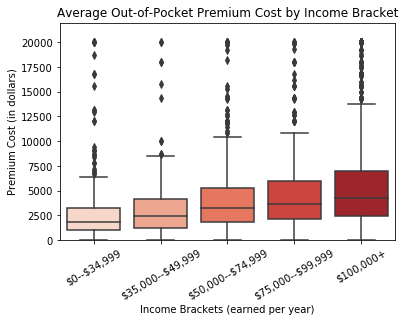

In [10]:
health = pd.read_csv('person_family_10k.csv')
premium_cost = health[health.HICOSTR1 < 90000]['HICOSTR1'].dropna() #Removed outliers of 90K+ in every income bracket. 
income_bracket = health[health.INCGRP4 < 6]['INCGRP4'] #Removed non-specific income bracket.
sns.boxplot(income_bracket, premium_cost, palette = 'Reds')
plt.ylim(0, 22000)
plt.xlabel('Income Brackets (earned per year)')
plt.ylabel('Premium Cost (in dollars)')
plt.title('Average Out-of-Pocket Premium Cost by Income Bracket')
plt.xticks([0,1,2,3,4],['\$0--\$34,999', '\$35,000--\$49,999', '\$50,000--\$74,999', '\$75,000--\$99,999', '$100,000+'], rotation = 30);

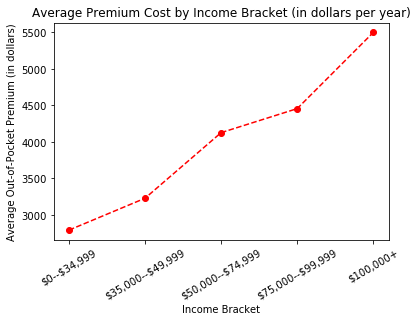

In [10]:
averages = premium_cost.groupby(income_bracket).mean()
plt.plot(range(5), averages, 'o--r');
plt.xlabel('Income Bracket')
plt.ylabel('Average Out-of-Pocket Premium (in dollars)')
plt.title('Average Premium Cost by Income Bracket (in dollars per year)')
plt.xticks([0,1,2,3,4], ['\$0--\$34,999','\$35,000--\$49,999', '\$50,000--\$74,999', '\$75,000--\$99,999', '$100,000+'], rotation = 30);

&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;As expected, the out-of-pocket premium is larger for people who make more per year, as they would have the means to pay that cost.

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



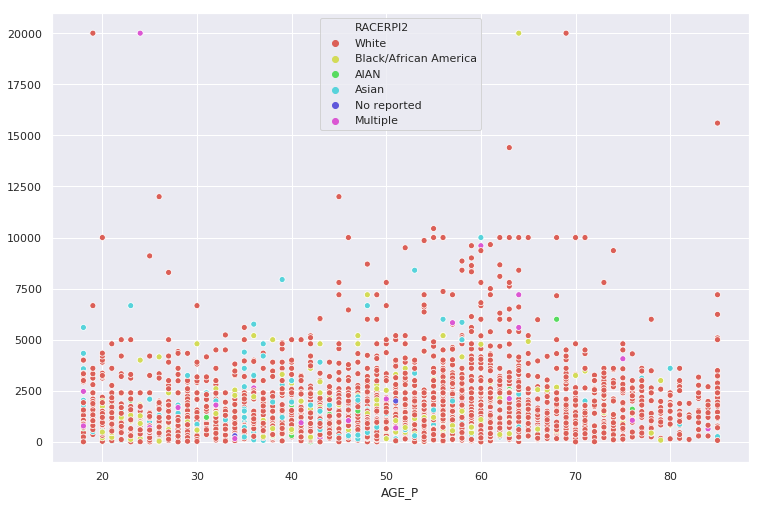

In [76]:
age = health[health.AGE_P>17] #Include only legal adults, as minors most likely aren't paying their own premium.
age['RACERPI2'] = pd.cut(age.RACERPI2, bins = [0,1,2,3,4,5,6], labels = ['White', 'Black/African America', 'AIAN', 'Asian', 'No reported', 'Multiple'])
cost_per_person = premium_cost/age['FM_SIZE'].dropna()
sns.set(rc={'figure.figsize':(12.5,8.27)})
sns.scatterplot(x=age['AGE_P'], y=cost_per_person, hue = 'RACERPI2', data = age, palette = 'hls');